# Different Tools for Sentiment
## Vader
https://github.com/cjhutto/vaderSentiment
- lexicon and rule-based
- attuned to sentiments expressed in social media
- open-sourced
### Demo
#### Importing Necesseties

- Make sure you install nltk before use vaderSentiment
- Use pip to install vaderSentiment "**pip install vaderSentiment**"
- If you use source code download, may need to import like "**from vaderSentiment import SentimentIntensityAnalyzer**"

In [98]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

- If it can't work, please try "**python -m pip install vaderSentiment --no-cache-dir**"

#### An Example

In [99]:
sentence = "I love summer!"
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores(sentence)
neg = sentiment_dict['neg']
neu = sentiment_dict['neu']
pos = sentiment_dict['pos']
compound = sentiment_dict['compound']
print('neg:', neg, 'neu:', neu, 'pos:', pos, 'compound', compound)


neg: 0.0 neu: 0.308 pos: 0.692 compound 0.6696


- Compound is a single unidimensional measure of sentiment
- It is normalized to be between -1 (most extreme negative) and +1 (most extreme positive)
- In vader, use **0.05** as the standardized threshold

### Use vader in our dataset
#### Importing Necesseties

### Use vader in our dataset
#### Importing Necesseties

In [100]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

- if "**module 'matplotlib' has no attribute 'get_data_path'**"
- try to restart the ide
- or **pip uninstall matplotlib** then **pip install matplotlib --user**

#### Read Data

In [101]:
df = pd.read_csv('C:/Users/y/Desktop/TweetIDs_Part1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 0 non-null      float64
 1   created_at                  6838 non-null   object 
 2   hashtags                    526 non-null    object 
 3   media                       927 non-null    object 
 4   urls                        1195 non-null   object 
 5   favorite_count              6838 non-null   int64  
 6   id                          6838 non-null   int64  
 7   in_reply_to_screen_name     2716 non-null   object 
 8   in_reply_to_status_id       2620 non-null   float64
 9   in_reply_to_user_id         2716 non-null   float64
 10  lang                        6838 non-null   object 
 11  place                       129 non-null    object 
 12  possibly_sensitive          2006 non-null   object 
 13  quote_id                    658 n

- This dataset is cleaned before, the "text" is without @Username/Hashtag/URL
- Reserve emoji because vader can catch utf-8 emoji and deal with it

In [102]:
def basic_cleaning(text):
    # clear url
    text = re.sub("(http|https|ftp)://[a-zA-Z0-9\\./]+", '', text)
    # remove tags
    text = re.sub("#(\w+)", " ", text)
    # remove @xxx 
    text = re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text)
#     # clear not alpha
#     text = re.sub(r'[^a-zA-Z|\s]', '', text)
    return text

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def clean(df):
    for col in ['text']:
        df[col] = df[col].astype(str).apply(lambda x:basic_cleaning(x))
        df[col] = df[col].astype(str).apply(lambda x:remove_html(x))
    return df

In [103]:
clean_df = clean(df)
text = clean_df['text']

- For vader, "text" is used as the input

#### Explore Data

In [104]:
def sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()

    score = []

    for sentence in text:
        sentiment_dict = sid_obj.polarity_scores(str(sentence))
        score_now = []
        score_now.append(sentiment_dict['neg'])
        score_now.append(sentiment_dict['neu'])
        score_now.append(sentiment_dict['pos'])
        score_now.append(sentiment_dict['compound'])
        score.append(score_now)
    return score

- function to get the score

In [105]:
sentiment_scores(["monkeypox","monkey pox","Monkeypox","Monkey pox"])

[[0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0]]

- according the above test, the words of monkeypox means 100% neural for vader

In [106]:
sentiment = np.array(sentiment_scores(text))
print(sentiment)

[[ 0.286   0.714   0.     -0.886 ]
 [ 0.1     0.9     0.     -0.4767]
 [ 0.055   0.945   0.     -0.4095]
 ...
 [ 0.235   0.765   0.     -0.8478]
 [ 0.128   0.872   0.     -0.5719]
 [ 0.      0.73    0.27    0.9042]]


- get the sentiment score array

In [107]:
sentiment_sort = sentiment[sentiment[:, 3].argsort()]
print(sentiment_sort)

[[ 0.546   0.454   0.     -0.9925]
 [ 0.556   0.444   0.     -0.989 ]
 [ 0.422   0.515   0.063  -0.9814]
 ...
 [ 0.064   0.563   0.372   0.9823]
 [ 0.042   0.523   0.436   0.9824]
 [ 0.196   0.412   0.392   0.992 ]]


- sort it by the last column

#### Visualization

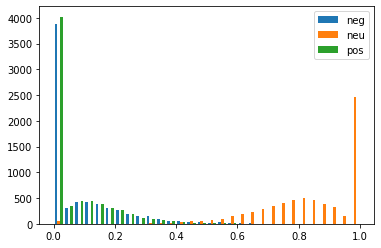

In [108]:
plt.hist(sentiment_sort[:,0:3],bins=30,label=["neg","neu","pos"])
plt.legend()
plt.show()

- the sore of neu is obviously higher

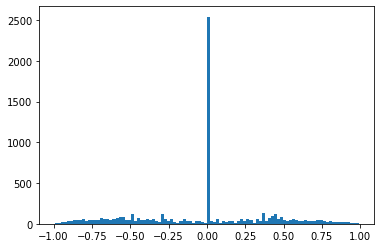

In [109]:
plt.hist(sentiment_sort[:,3],bins=100,label=['compound'])
plt.show()

In [110]:
def piechart(sentiment):
    pos_number = sum(sentiment>=0.05)
    neg_number = sum(sentiment<=-0.05)
    neu_number = len(sentiment)-pos_number-neg_number
    pie = [pos_number,neg_number,neu_number]
    return pie

[0.28911963 0.32918982 0.38169055]


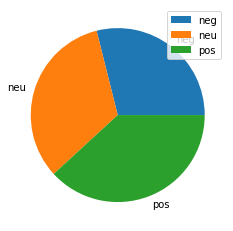

In [111]:
pie = piechart(sentiment[:,3])
print(pie/sum(pie))
plt.pie(pie,labels=["neg","neu","pos"])
plt.legend()
plt.show()

- the above pie chart shows the sentiment
- quite strange to find that the percentage of pos is the highest whitch means more people are positive facing monkeypox

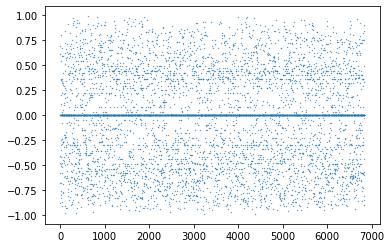

In [112]:
plt.scatter(np.arange(len(sentiment[:,3])),sentiment[:,3],s=0.1)
plt.show()

## Textblob
https://github.com/sloria/TextBlob
- a Python library for processing textual data(including sentiment analysis)
### Demo
#### Importing Necesseties

In [113]:
from textblob import TextBlob

**pip install -U textblob** && **python -m textblob.download_corpora**
- use the above commands to install textblob

#### An Example

In [114]:
test1 = TextBlob("good")
print(test1.sentiment.subjectivity)
print(test1.sentiment.polarity)
test2 = TextBlob("better")
print(test2.sentiment.subjectivity)
print(test2.sentiment.polarity)

0.6000000000000001
0.7
0.5
0.5


- the subjectivity is a float within the range[0.0,1] where 0.0 is very objective and 1.0 is very subjective
- the polarity score is a float within the range[-1.0,1.0]

### Use textblob in our dataset
#### Importing Necesseties

In [115]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji

- Textblob can't deal with emoji, so transfer it before using the emoji library

#### Explore Data

In [116]:
textblob = df[['created_at','text']]
textblob['text'] = textblob['text'].astype(str).apply(lambda x: emoji.demojize(x))
textblob.info()
textblob.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  6838 non-null   object
 1   text        6838 non-null   object
dtypes: object(2)
memory usage: 107.0+ KB


,created_at,text
0,Sat May 21 21:51:16 +0000 2022,Watch the progressive monkeys run out screamin...
1,Sat May 21 22:25:48 +0000 2022,When you have Bill Gates shorting Tesla for ...
2,Sat May 21 22:24:39 +0000 2022,"Monkey pox as reported by Reuters \n\n“Gay, bi..."
3,Sat May 21 22:27:59 +0000 2022,Hey Pete\nPeople are crazy 'Busy'\nWe can't ...
4,Sat May 21 22:24:11 +0000 2022,"_tx _FDA Well, you know the new thing is..."


In [117]:
pd.options.mode.chained_assignment = None
textblob['sentiment'] = textblob['text'].apply(lambda review: TextBlob(review).sentiment) 
textblob['Polarity'] = textblob['sentiment'].apply(lambda x: round(x[0],2)) 
textblob['Subjectivity'] = textblob['sentiment'].apply(lambda x: round(x[1],2)) 
textblob.head()

,created_at,text,sentiment,Polarity,Subjectivity
0,Sat May 21 21:51:16 +0000 2022,Watch the progressive monkeys run out screamin...,"(-0.1625, 0.3875)",-0.16,0.39
1,Sat May 21 22:25:48 +0000 2022,When you have Bill Gates shorting Tesla for ...,"(-0.04583333333333334, 0.058333333333333334)",-0.05,0.06
2,Sat May 21 22:24:39 +0000 2022,"Monkey pox as reported by Reuters \n\n“Gay, bi...","(0.08166666666666667, 0.30833333333333335)",0.08,0.31
3,Sat May 21 22:27:59 +0000 2022,Hey Pete\nPeople are crazy 'Busy'\nWe can't ...,"(-0.1375, 0.55)",-0.14,0.55
4,Sat May 21 22:24:11 +0000 2022,"_tx _FDA Well, you know the new thing is...","(0.12402597402597403, 0.33008658008658004)",0.12,0.33


#### Visualization

[0.25226674 0.53041825 0.217315  ]


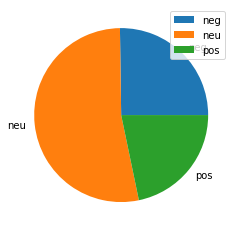

In [118]:
p=piechart(textblob['Polarity'])
print(p/np.sum(p))
plt.pie(p,labels=["neg","neu","pos"])
plt.legend()
plt.show()

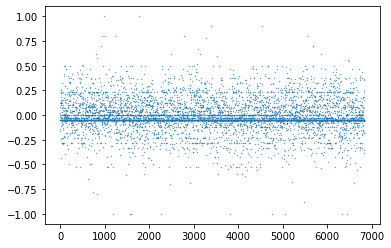

mean: -0.03146007604562738
var: 0.18195339776846453
std: 0.42655995799941715


In [119]:
plt.scatter(np.arange(len(textblob['Polarity'])),textblob['Polarity'],s=0.1)
plt.show()
print("mean:",np.mean(sentiment[:,3]))
print("var:",np.var(sentiment[:,3]))
print("std:",np.std(sentiment[:,3]))

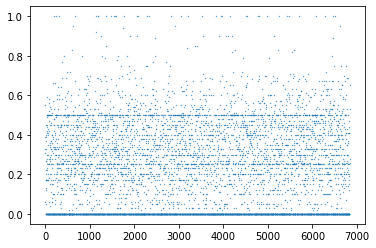

In [120]:
plt.scatter(np.arange(len(textblob['Subjectivity'])),textblob['Subjectivity'],s=0.1)
plt.show()

### Going from twitter date to Python datetime date

In [72]:
from datetime import datetime
textblob['created_at']= textblob['created_at'].apply(lambda dtime: datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S'))
textblob['created_at']= pd.to_datetime(textblob['created_at'])

In [158]:
textblob.head()

,created_at,text,sentiment,Polarity,Subjectivity
0,2022-05-21 21:51:16,Watch the progressive monkeys run out screamin...,"(-0.1625, 0.3875)",-0.16,0.39
1,2022-05-21 22:25:48,When you have Bill Gates shorting Tesla for ...,"(-0.04583333333333334, 0.058333333333333334)",-0.05,0.06
2,2022-05-21 22:24:39,"Monkey pox as reported by Reuters \n\n“Gay, bi...","(0.08166666666666667, 0.30833333333333335)",0.08,0.31
3,2022-05-21 22:27:59,Hey Pete\nPeople are crazy 'Busy'\nWe can't ...,"(-0.1375, 0.55)",-0.14,0.55
4,2022-05-21 22:24:11,"_tx _FDA Well, you know the new thing is...","(0.12402597402597403, 0.33008658008658004)",0.12,0.33
